<a href="https://colab.research.google.com/github/hatemrizk/Federated_Learning_Model_Inversion-Attack/blob/main/FedFomo_Model_Inversion_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model Inversion Attack Demonstration Against Personalized Federated Learning Framework with Security and Privacy vulnerabilities**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/UMKC/CSEE-5590-0004-Cyber_Security_AI/FedFomo-main"

In [ ]:
%cd {path}

/content/drive/MyDrive/UMKC/CSEE-5590-0004-Cyber_Security_AI/FedFomo-main


In [ ]:
%mkdir data logs models precomputed results

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘logs’: File exists
mkdir: cannot create directory ‘models’: File exists
mkdir: cannot create directory ‘precomputed’: File exists
mkdir: cannot create directory ‘results’: File exists


In [ ]:
%pip install -r requirements.txt

In [ ]:
import torch
import torchvision
print("pytorch version: " + torch.__version__)
print("torchvision version: " + torchvision.__version__)

pytorch version: 1.11.0+cu113
torchvision version: 0.12.0+cu113


In [ ]:
!pip install opacus

     |████████████████████████████████| 176 kB 9.1 MB/s 


In [ ]:
!pip install stats 

     |████████████████████████████████| 127 kB 8.7 MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24299 sha256=dfca4080e2d710348287553cb5efe42f7ecab4217d740b326bc7e0139c7f1f3b
  Stored in directory: /root/.cache/pip/wheels/e3/1c/58/620049eecc13fb5b4920470895e07a39f86e889a0a58b11976
Successfully built stats


In this section we use the modified FedFOMO Personalized Federated Learning Framework to train models using our modifed CNN which is built based on a split model approach. This alghorithm as security and privacy vulnerabilities that we seek to demonstrate here in this excercise and as basis for further research for personalized privacy preserving FL. The split mode here enables us to create an attack model that will recover features from the embedding vector producted by the first layer in our CNN.

In [ ]:
# 5 models, split model 
!python main.py --dataset cifar10 --max_epoch 2 --federation_epoch 12 --federation_method fomo --num_update_clients 4 --num_distributions 5 --num_clients 15 --client_weight_method e_greedy --client_weight_epsilon 0.3 --client_weight_epsilon_decay 0.05 --leave_one_out --model_weight_delta 1 -r 0 --momentum 0.0 --bs_trn 50 --bs_val 50 --lr 0.1 --learning_rate_decay 0.99 --optimizer sgd -elfs 0 --seed 0 --data_seed 0 -nlvp 0. -lvr 1. --baseline_model first_model --arch split --softmax_client_weights --train_split 0.8 -fr 1.0 -nf 5 --device 0

Streaming output truncated to the last 5000 lines.
----------------------------------------------------------------------------------------------------------
Epoch: 12 | Client 6  | Dist 2  | Train accuracy: 0.6991 | Train loss: 0.8349 | Batch train time: 23.20 ms
Epoch: 12 | Client 6  | Dist 2  | Eval  accuracy: 0.7210 | Eval  loss: 0.9368 | Batch eval  time: 19.96 ms
----------------------------------------------------------------------------------------------------------
Epoch: 12 | Client 8  | Dist 2  | Train accuracy: 0.7156 | Train loss: 0.8284 | Batch train time: 23.21 ms
Epoch: 12 | Client 8  | Dist 2  | Eval  accuracy: 0.6725 | Eval  loss: 0.9763 | Batch eval  time: 20.17 ms
----------------------------------------------------------------------------------------------------------
Epoch: 12 | Client 9  | Dist 3  | Train accuracy: 0.6807 | Train loss: 0.7341 | Batch train time: 23.72 ms
Epoch: 12 | Client 9  | Dist 3  | Eval  accuracy: 0.7644 | Eval  loss: 0.6680 | Batch eval  t

After training for 2 federated rounds and 12 local epoch per round. We have 24 saved models and our results are displayed below in particular I have filtered based on client # 13. Please note the federated_client_ids columns: in the first round, an initial model is trained purely on local data before being shared with the server and subsequently with other clients. At this point, the model is highly suspecptle to leackage to recover original training data.

In [ ]:
 import pandas as pd

In [ ]:
results = pd.read_csv("./results/replicate-0/client_train-m=fomo-d=cifar10-nd=5-nc=15-rd=False-ts=0.8-me=2-arch=split-lr=0.1-lrd=0.99-mo=0.0-o=sgd-bst=50-bsv=50-fe=12-cm=eg-b=fm-wd=1.0-nuc=4-we=0.3-wed=0.05-scw=True-nf=5-ds=0-s=0-r=0.csv")

In [ ]:
results[results['client']==13].head(20)

,train_acc,train_loss,val_acc,val_loss,epoch,client,distribution,federation,federation_round,federating_client_ids,client_weights,model_deltas,EMD,target_distribution,unique_classes
312,0.466128,1.190148,0.433490,1.064129,0,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
313,0.477290,1.017531,0.655712,0.978589,1,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
314,0.556967,0.956593,0.660407,0.880339,2,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
315,0.612779,0.932603,0.660407,0.881979,3,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
316,0.649346,0.891516,0.702660,0.830355,4,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
317,0.655119,0.861541,0.674491,0.842054,5,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
318,0.667052,0.843569,0.729264,0.819718,6,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
319,0.672055,0.824933,0.737089,0.780435,7,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
320,0.690916,0.804315,0.741784,0.766046,8,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN
321,0.691301,0.793300,0.735524,0.747160,9,13,4,NaN,0,[None],[-0.07026564 -0.11898115 0. -0.384324...,NaN,2.770967,NaN,NaN


Below is plot showing Training and Validation Loss of client 13. The first 12 epochs are trained locally and the last 12 epochs are in round 2 with the model including contributions from co-federated clients based on affinity matrix maintained by the server and updated regulary based on performance of shared models testing on local task.

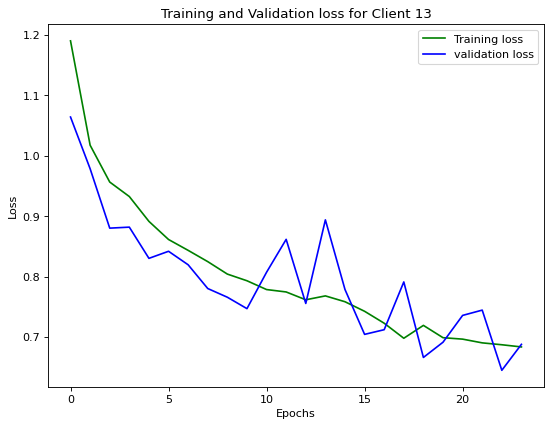

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
epochs = range(0, 24)
plt.plot(epochs, results[results['client']==13]['train_loss'], 'g', label='Training loss')
plt.plot(epochs, results[results['client']==13]['val_loss'], 'b', label='validation loss')
plt.title('Training and Validation loss for Client ' + str(13))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Below is plot showing Training and Validation Accuracy of client 13.

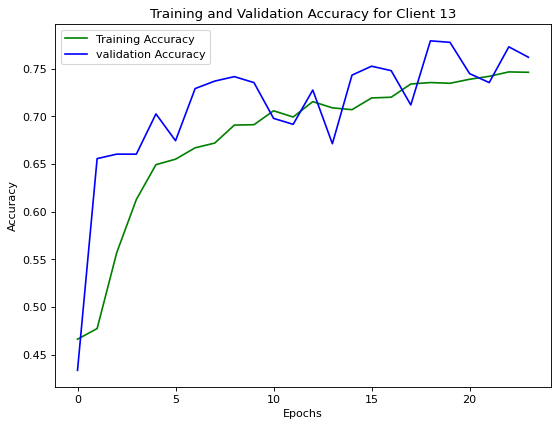

In [ ]:
epochs = range(0,24)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(epochs, results[results['client']==13]['train_acc'], 'g', label='Training Accuracy')
plt.plot(epochs, results[results['client']==13]['val_acc'], 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy for Client ' + str(13))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Load CIFAR 10 dataset and create dataloaders

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset

batch_size = 50

# CIFAR-10 normalization constants for reference
cifar10_normalize = transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),
                                          std=(0.2470, 0.2435, 0.2616))

transform = transforms.Compose([transforms.RandomCrop(32,padding=4),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                cifar10_normalize])

test_transform = transforms.Compose([transforms.ToTensor(),
                                cifar10_normalize])

# Download and load the training data
CIFAR10_train_data = datasets.CIFAR10('datasets/cifar10/train/', train = True, download = True, transform=transform)
CIFAR10_test_data = datasets.CIFAR10('datasets/cifar10/test/', train = False, download = True, transform=test_transform)

CIFAR10_trainloader = torch.utils.data.DataLoader(CIFAR10_train_data, batch_size=batch_size, shuffle=True)
CIFAR10_testloader = torch.utils.data.DataLoader(CIFAR10_test_data, batch_size=batch_size, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting datasets/cifar10/train/cifar-10-python.tar.gz to datasets/cifar10/train/


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting datasets/cifar10/test/cifar-10-python.tar.gz to datasets/cifar10/test/


Displau a sample of images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


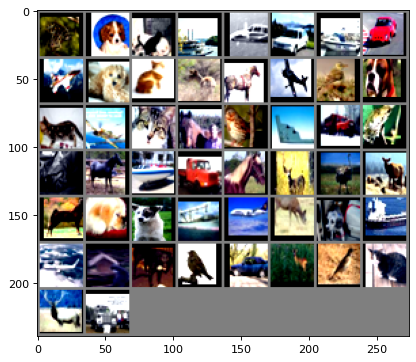

frog  dog   cat   ship  plane car   ship  car   plane dog   cat   deer  horse plane bird  dog   cat   plane cat   horse bird  plane truck frog  cat   horse ship  truck horse deer  bird  deer  horse dog   dog   ship  plane deer  dog   ship  plane cat   dog   bird  car   deer  bird  cat   deer  truck


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# functions to show an image
plt.figure(figsize=(6, 6), dpi=80)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(CIFAR10_trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Here are the networks used in our FedFOMO and our attack model. Here we load the saved model for client 13.

In [ ]:
from torch import nn, optim
import os

class BaseConvNetSplit(nn.Module):
    """
    Split_Network architecture in the PyTorch image classification tutorial
    """
    def __init__(self):
        super(BaseConvNetSplit, self).__init__()
        self.first_part = nn.Sequential(
          nn.Conv2d(3, 6, 5),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),
          nn.Conv2d(6, 16, 5),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),
          nn.Flatten(1),
          nn.Linear(400, 1600)
        )
        self.second_part = nn.Sequential(
          nn.Linear(1600, 84),
          nn.ReLU(),
          nn.Linear(84, 10)
        )
    def forward(self, x):
      return self.second_part(self.first_part(x))
  
class BaseConvAttackNet(nn.Module):
  """ Attack model """
  def __init__(self):
    super(BaseConvAttackNet, self).__init__()
    self.layers= nn.Sequential(
                      nn.Linear(1600, 4096),
                      nn.ReLU(),
                      nn.Linear(4096, 2048),
                      nn.ReLU(),
                      nn.Linear(2048, 3072) #3x32x32
                    )

  def forward(self, x):
    return self.layers(x)

model_path = os.path.join(path , "models", "m_c13_d4_e0-m=fomo-d=cifar10-nd=5-nc=15-rd=False-ts=0.8-me=2-arch=split-lr=0.1-lrd=0.99-mo=0.0-o=sgd-bst=50-bsv=50-fe=12-cm=eg-b=fm-wd=1.0-nuc=4-we=0.3-wed=0.05-scw=True-nf=5-ds=0-s=0-r=0.pt")
target_model = BaseConvNetSplit()
target_model.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [ ]:
#instantiate attack model
attacker = BaseConvAttackNet()
attack_optimizer = optim.Adam(attacker.parameters(), lr=1e-3)

Train attack model to re-create images based on embedding layer vector producted by trained client #13.

In [ ]:
running_loss = 0

for images, targets in CIFAR10_trainloader:
  # Reset gradients

  attack_optimizer.zero_grad()

  target_outputs = target_model.first_part(images) 

  # Next, recreate the data with the attacker
  attack_outputs = attacker(target_outputs).view(images.shape[0], 3, 32, 32)

  # We want attack outputs to resemble the original data
  loss = ((images - attack_outputs)**2).mean() #MSE loss function

  # Update the attack model
  loss.backward()
  attack_optimizer.step()
  running_loss += loss
print(f"Training loss: {running_loss/len(CIFAR10_trainloader)}")

Training loss: 0.5236375331878662


In [ ]:
images.shape

torch.Size([50, 3, 32, 32])

In [ ]:
attack_outputs.shape

torch.Size([50, 3, 32, 32])

Re-create images using trained attack model.

In [ ]:
for images, targets in CIFAR10_testloader:
  # First, get outputs from the target model
  reshaped_images = images
  target_outputs = target_model.first_part(reshaped_images)
  recreated_data = attacker(target_outputs)
  break

Comparing original and reproduced images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<built-in method size of Tensor object at 0x7f268a008590>
<built-in method size of Tensor object at 0x7f26ab142650>
<built-in method size of Tensor object at 0x7f268a9877d0>
<built-in method size of Tensor object at 0x7f268a84aa10>
<built-in method size of Tensor object at 0x7f2689ff5290>


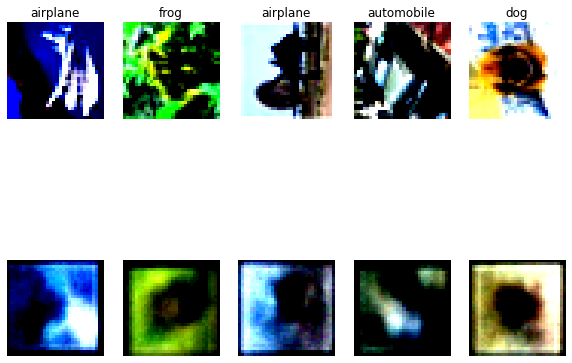

In [ ]:
figure = plt.figure(figsize=(10, 8))
sample_indices = torch.randint(len(images), size=(5,))
cols, rows = 5, 2
labels_dict = {y:x for x,y in CIFAR10_train_data.class_to_idx.items()} 
for i in range(1, 6):
    sample_idx = sample_indices[i-1]
    img, label = images[sample_idx], targets[sample_idx]
    print(label.size)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_dict[label.item()])
    plt.axis("off")
    plt.imshow(img.T.squeeze(), cmap="gray")

for i in range(6, 11):
    sample_idx = sample_indices[i-6]
    recreated_img = recreated_data[sample_idx].view(3, 32, 32).detach().numpy()
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(recreated_img.T, cmap="gray")

Repeat above for client 13 trained model after 2 federated epochs.

In [ ]:
model_path = os.path.join(path , "models", "m_c13_d4_e1-m=fomo-d=cifar10-nd=5-nc=15-rd=False-ts=0.8-me=2-arch=split-lr=0.1-lrd=0.99-mo=0.0-o=sgd-bst=50-bsv=50-fe=12-cm=eg-b=fm-wd=1.0-nuc=4-we=0.3-wed=0.05-scw=True-nf=5-ds=0-s=0-r=0.pt")
target_model = BaseConvNetSplit()
target_model.load_state_dict(torch.load(model_path))

attacker = BaseConvAttackNet()
attack_optimizer = optim.Adam(attacker.parameters(), lr=1e-3)

In [ ]:
running_loss = 0

for images, targets in CIFAR10_trainloader:
  # Reset gradients

  attack_optimizer.zero_grad()

  target_outputs = target_model.first_part(images) 

  # Next, recreate the data with the attacker
  attack_outputs = attacker(target_outputs).view(images.shape[0], 3, 32, 32)

  # We want attack outputs to resemble the original data
  loss = ((images - attack_outputs)**2).mean() #MSE loss function

  # Update the attack model
  loss.backward()
  attack_optimizer.step()
  running_loss += loss
print(f"Training loss: {running_loss/len(CIFAR10_trainloader)}")

Training loss: 0.6295971274375916


In [ ]:
for images, targets in CIFAR10_testloader:
  # First, get outputs from the target model
  reshaped_images = images
  target_outputs = target_model.first_part(reshaped_images)
  recreated_data = attacker(target_outputs)
  break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<built-in method size of Tensor object at 0x7f268a645b90>
<built-in method size of Tensor object at 0x7f26ab12ee90>
<built-in method size of Tensor object at 0x7f26aa2d27d0>
<built-in method size of Tensor object at 0x7f268a8f4110>
<built-in method size of Tensor object at 0x7f26ad3109b0>


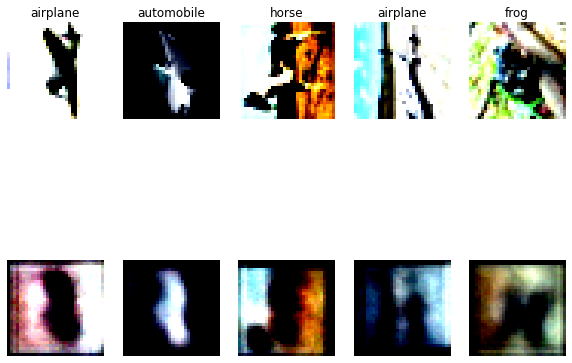

In [ ]:
figure = plt.figure(figsize=(10, 8))
sample_indices = torch.randint(len(images), size=(5,))
cols, rows = 5, 2
labels_dict = {y:x for x,y in CIFAR10_train_data.class_to_idx.items()} 
for i in range(1, 6):
    sample_idx = sample_indices[i-1]
    img, label = images[sample_idx], targets[sample_idx]
    print(label.size)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_dict[label.item()])
    plt.axis("off")
    plt.imshow(img.T.squeeze(), cmap="gray")

for i in range(6, 11):
    sample_idx = sample_indices[i-6]
    recreated_img = recreated_data[sample_idx].view(3, 32, 32).detach().numpy()
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(recreated_img.T, cmap="gray")

Repeat above for client 9 trained model after 1 federated epochs.

In [ ]:
model_path = os.path.join(path , "models", "m_c9_d3_e1-m=fomo-d=cifar10-nd=5-nc=15-rd=False-ts=0.8-me=2-arch=split-lr=0.1-lrd=0.99-mo=0.0-o=sgd-bst=50-bsv=50-fe=12-cm=eg-b=fm-wd=1.0-nuc=4-we=0.3-wed=0.05-scw=True-nf=5-ds=0-s=0-r=0.pt")
target_model = BaseConvNetSplit()
target_model.load_state_dict(torch.load(model_path))

attacker = BaseConvAttackNet()
attack_optimizer = optim.Adam(attacker.parameters(), lr=1e-3)




In [ ]:
running_loss = 0

for images, targets in CIFAR10_trainloader:
  # Reset gradients

  attack_optimizer.zero_grad()

  target_outputs = target_model.first_part(images) 

  # Next, recreate the data with the attacker
  attack_outputs = attacker(target_outputs).view(images.shape[0], 3, 32, 32)

  # We want attack outputs to resemble the original data
  loss = ((images - attack_outputs)**2).mean() #MSE loss function

  # Update the attack model
  loss.backward()
  attack_optimizer.step()
  running_loss += loss
print(f"Training loss: {running_loss/len(CIFAR10_trainloader)}")

Training loss: 0.6108207106590271


In [ ]:
for images, targets in CIFAR10_testloader:
  # First, get outputs from the target model
  reshaped_images = images
  target_outputs = target_model.first_part(reshaped_images)
  recreated_data = attacker(target_outputs)
  break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<built-in method size of Tensor object at 0x7f268a4b6230>
<built-in method size of Tensor object at 0x7f268a957e90>
<built-in method size of Tensor object at 0x7f26a2dde6b0>
<built-in method size of Tensor object at 0x7f268a413050>
<built-in method size of Tensor object at 0x7f268a9cc890>


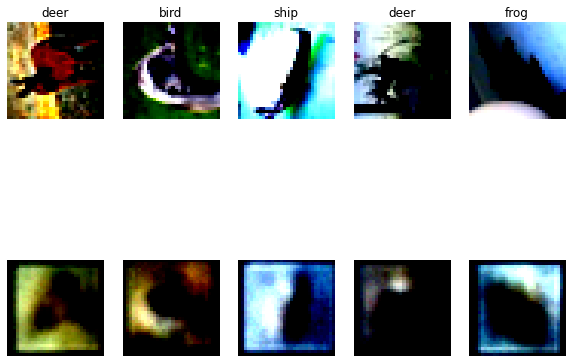

In [ ]:
figure = plt.figure(figsize=(10, 8))
sample_indices = torch.randint(len(images), size=(5,))
cols, rows = 5, 2
labels_dict = {y:x for x,y in CIFAR10_train_data.class_to_idx.items()} 
for i in range(1, 6):
    sample_idx = sample_indices[i-1]
    img, label = images[sample_idx], targets[sample_idx]
    print(label.size)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_dict[label.item()])
    plt.axis("off")
    plt.imshow(img.T.squeeze(), cmap="gray")

for i in range(6, 11):
    sample_idx = sample_indices[i-6]
    recreated_img = recreated_data[sample_idx].view(3, 32, 32).detach().numpy()
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(recreated_img.T, cmap="gray")